# ***ANÁLISIS EXPLORATORIO DE DATOS (EDA)***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
    - [1.1. Carga de datos](#11)
    - [1.2. Análisis visual](#12)
    - [1.3. Análisis estadístico](#13)   
2. MACHINE LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

## 0. INTRODUCCIÓN:

Se utiliza un dataset cuya target es el `churn rate`.

El **churn rate**, también conocido como tasa de abandono o tasa de pérdida de clientes, es una métrica utilizada en el análisis empresarial para medir la tasa a la cual los clientes de una empresa o servicio dejan de utilizarlo o cancelan su suscripción en un período de tiempo determinado.

Esta métrica es crucial para las empresas, ya que el mantenimiento y crecimiento de la base de clientes es fundamental para el éxito y la rentabilidad a largo plazo. Un alto churn rate indica que la empresa está perdiendo una proporción significativa de sus clientes, lo cual puede ser perjudicial para su crecimiento y estabilidad financiera.

In [1]:
# Librery
from utils.libreries import *
%matplotlib inline



##  **1.1. Acondicionamiento bases de datos**<a id='11'></a>

In [2]:
# Read all csv 
preroot=os.getcwd()
df=pd.read_csv(preroot+'/data/raw/client_dataset.csv',sep=';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idClient          10000 non-null  int64  
 1   Score             10000 non-null  int64  
 2   CountryLocation   10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Games Balance     10000 non-null  float64
 7   NumOfProducts     10000 non-null  int64  
 8   HasPremiumAccess  10000 non-null  int64  
 9   IsActiveMember    10000 non-null  int64  
 10  Cumulative score  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df.isna().sum()*100/len(df)

idClient            0.0
Score               0.0
CountryLocation     0.0
Gender              0.0
Age                 0.0
Tenure              0.0
Games Balance       0.0
NumOfProducts       0.0
HasPremiumAccess    0.0
IsActiveMember      0.0
Cumulative score    0.0
Churn               0.0
dtype: float64

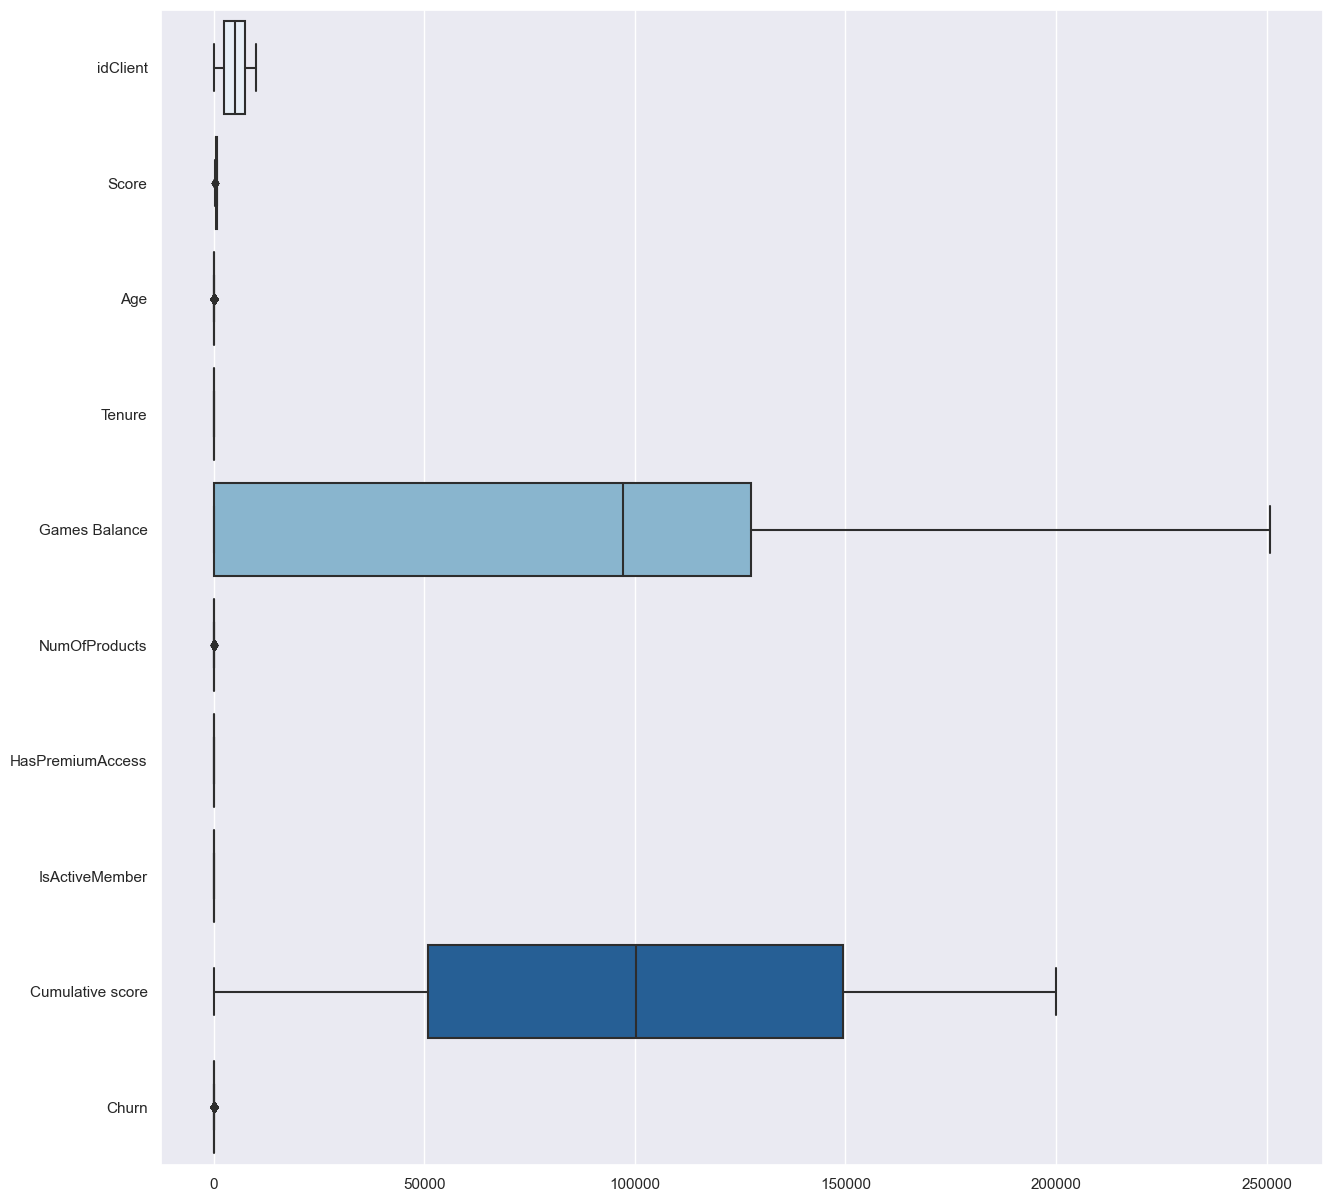

In [4]:
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(15, 15)})
sns.boxplot(data=df,orient='h',palette='Blues');

In [5]:
df2 = df.copy()

In [6]:
df2 = df._get_numeric_data()

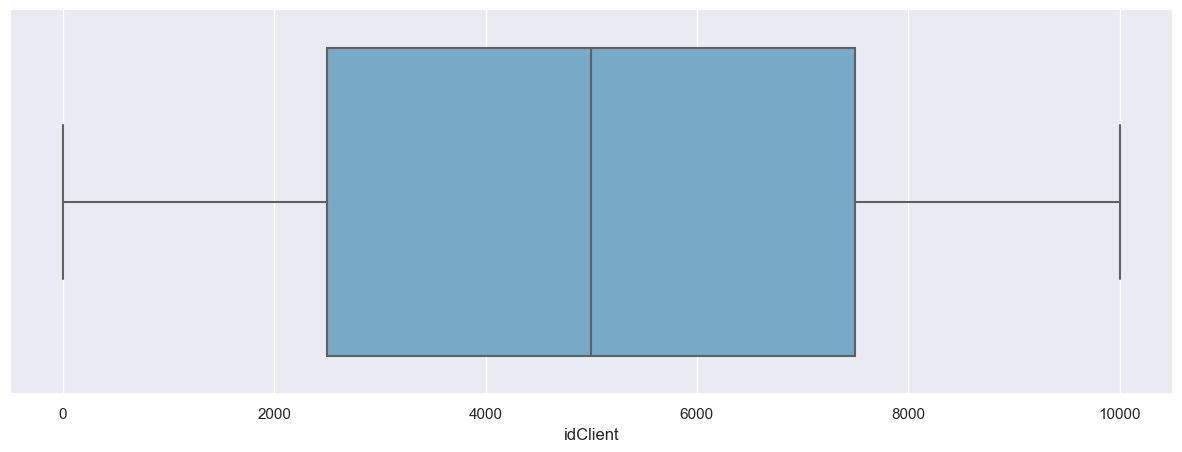

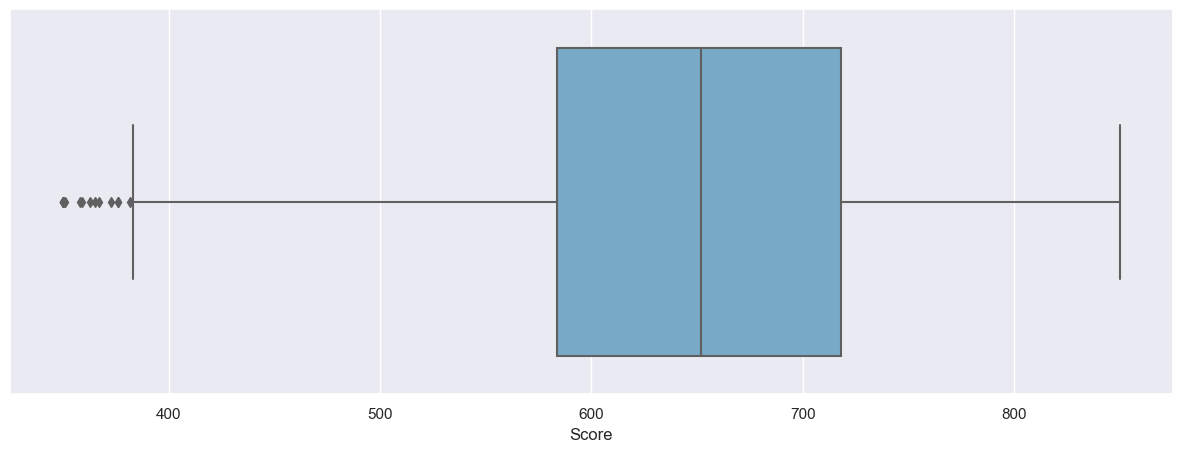

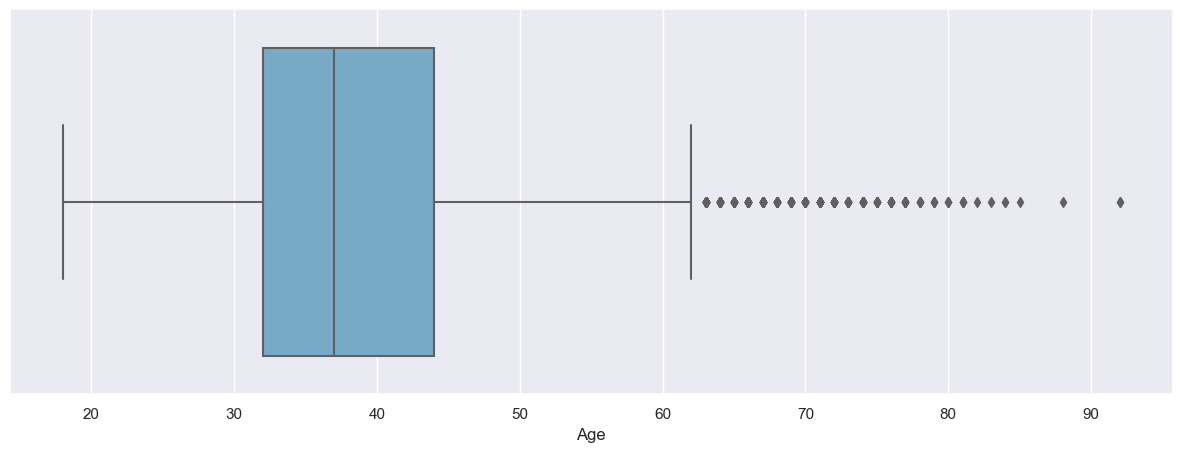

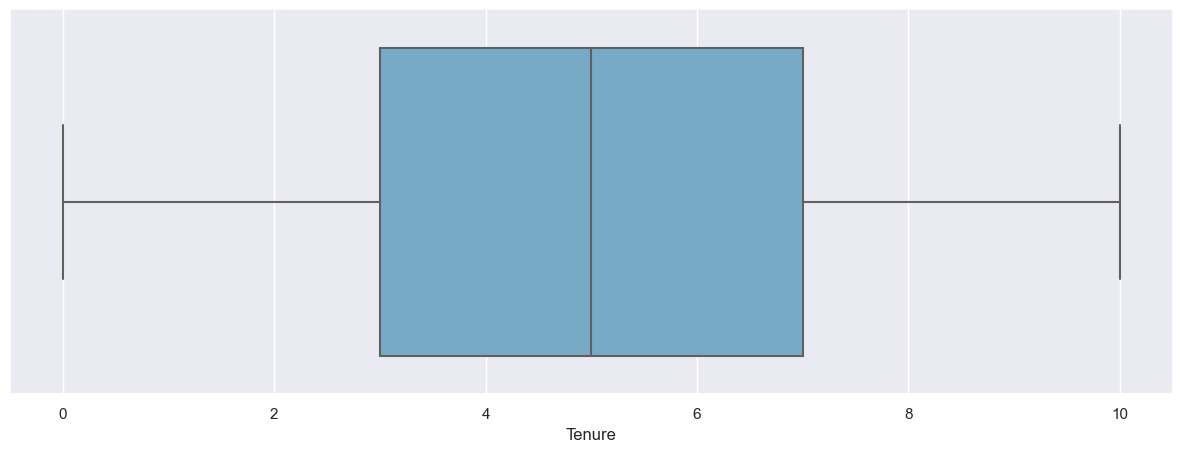

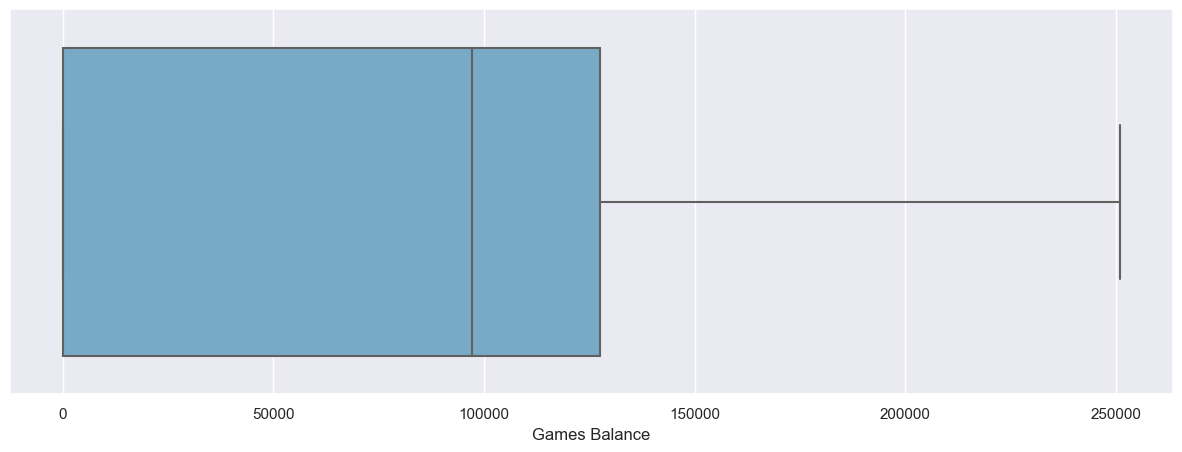

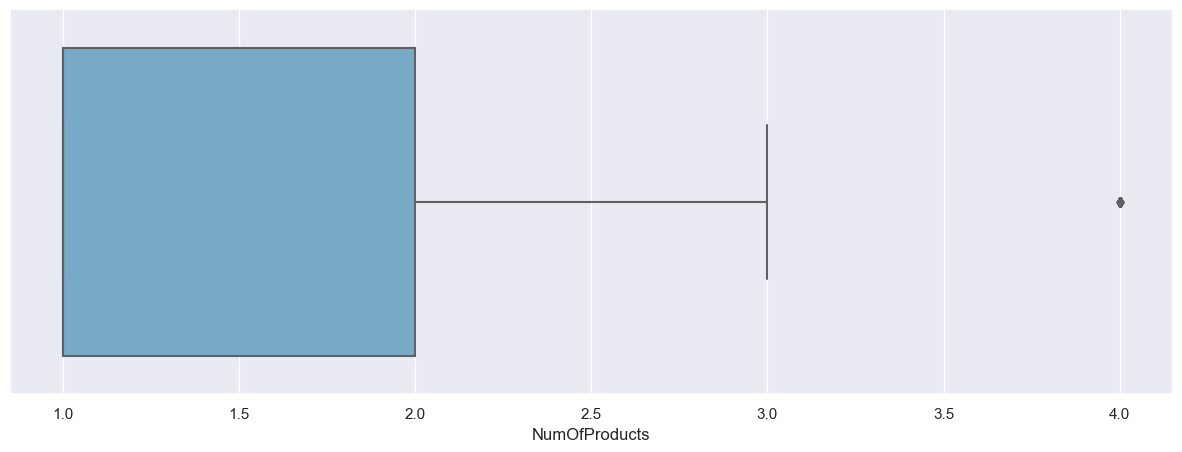

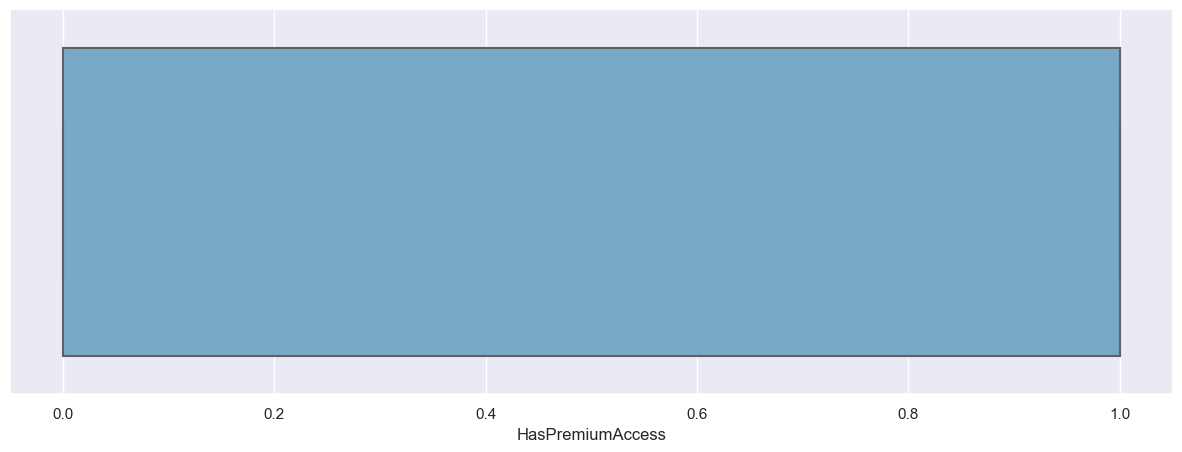

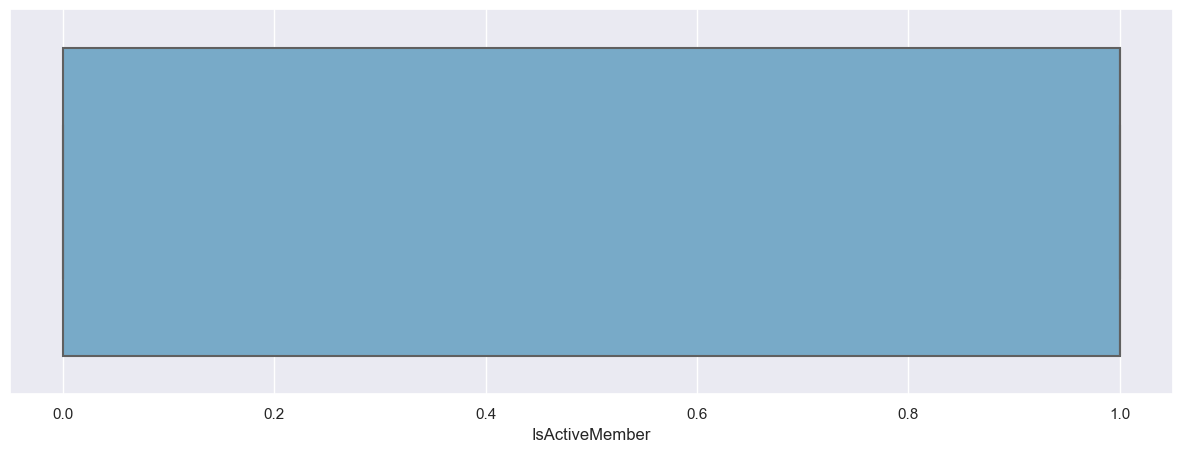

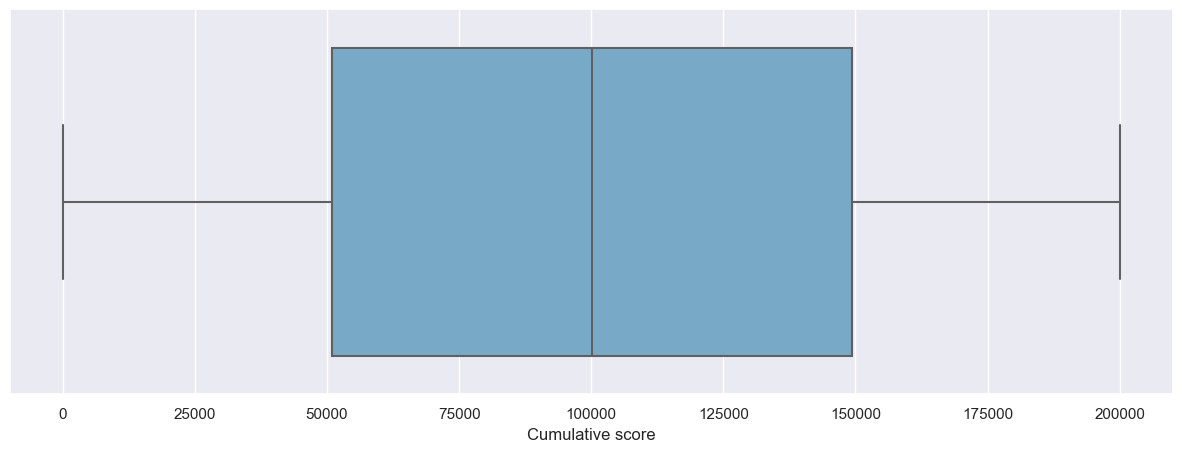

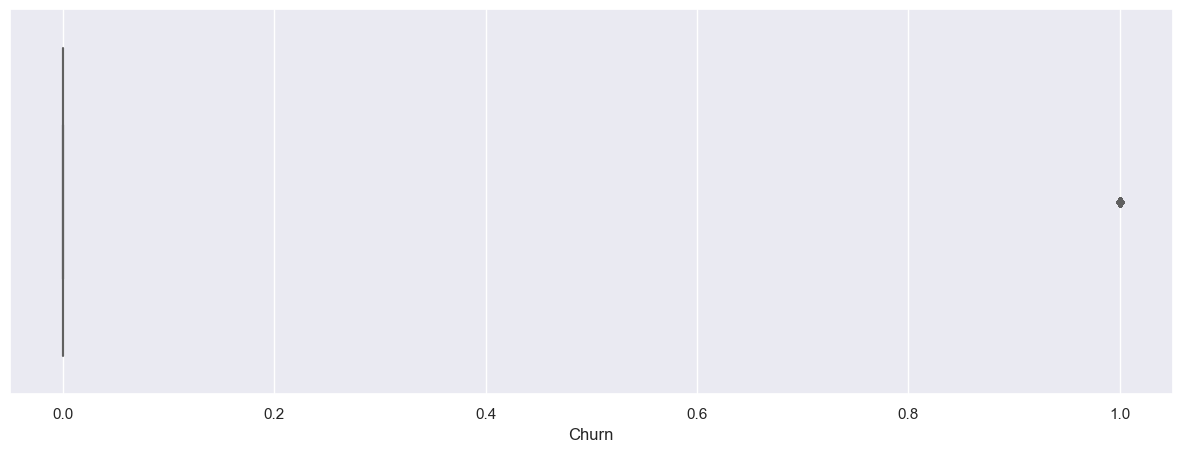

In [7]:
sns.set(rc={'figure.figsize':(15, 5)})
for i in df2.columns:
    
    sns.boxplot(data=df,x=df[i],orient='h',palette='Blues');
    plt.show()
    

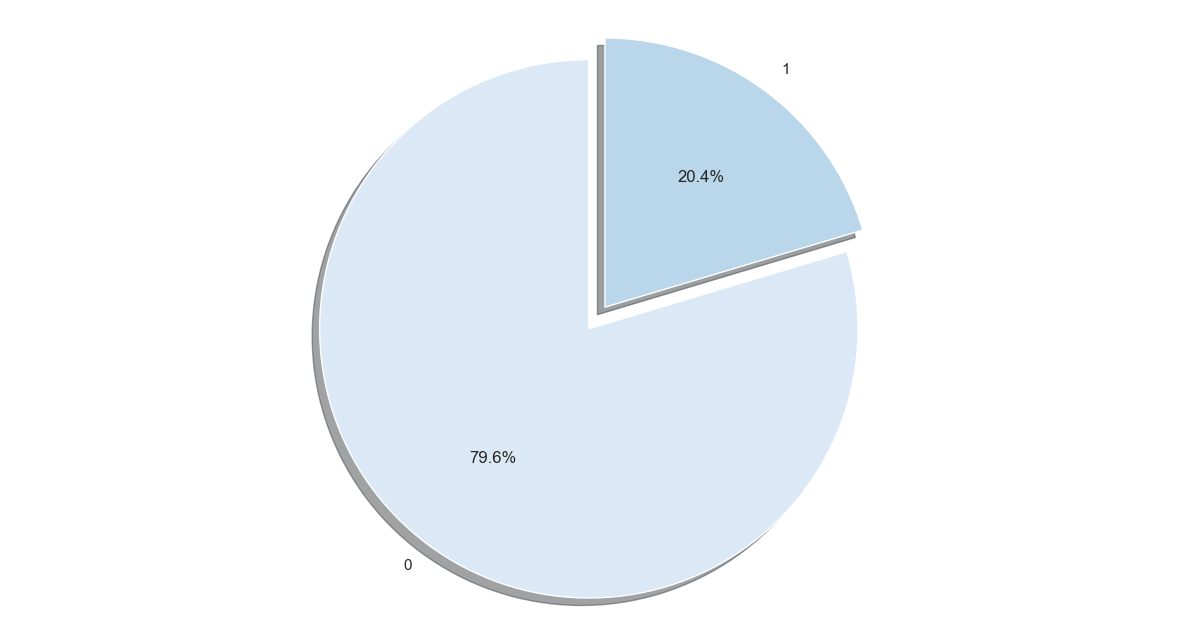

<Axes: xlabel='Churn', ylabel='count'>

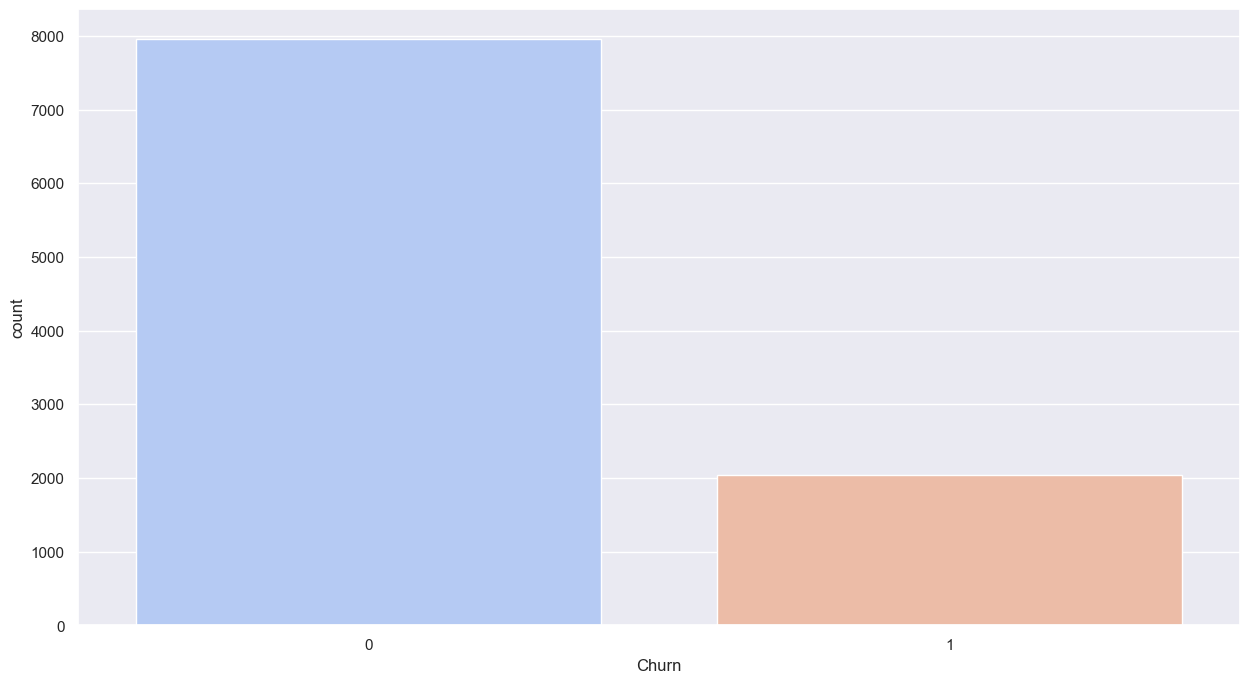

In [8]:
target = 'Churn'
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df[target].value_counts().index
sizes = df[target].value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=target,data=df,palette="coolwarm")

##  **1.2. Análisis visual**<a id='12'></a>

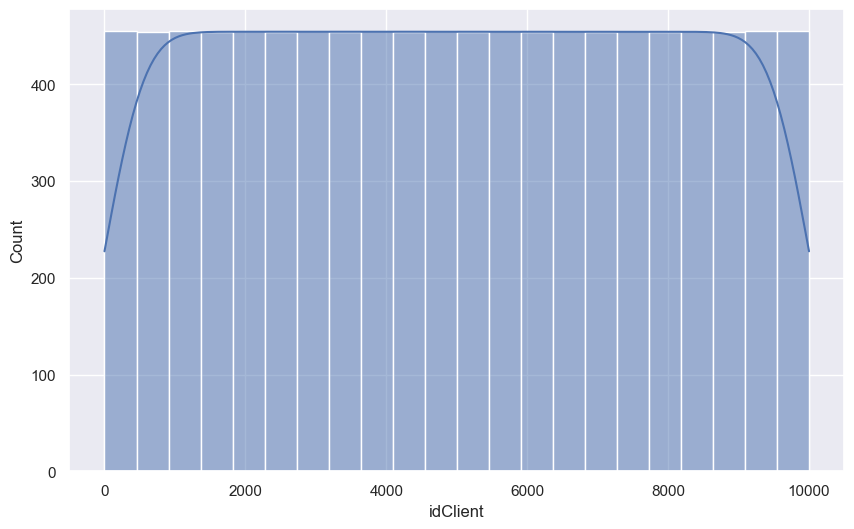

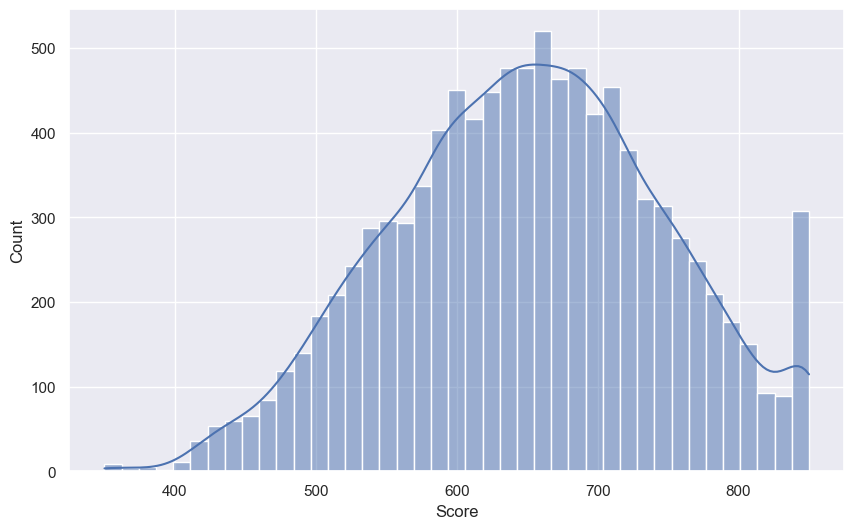

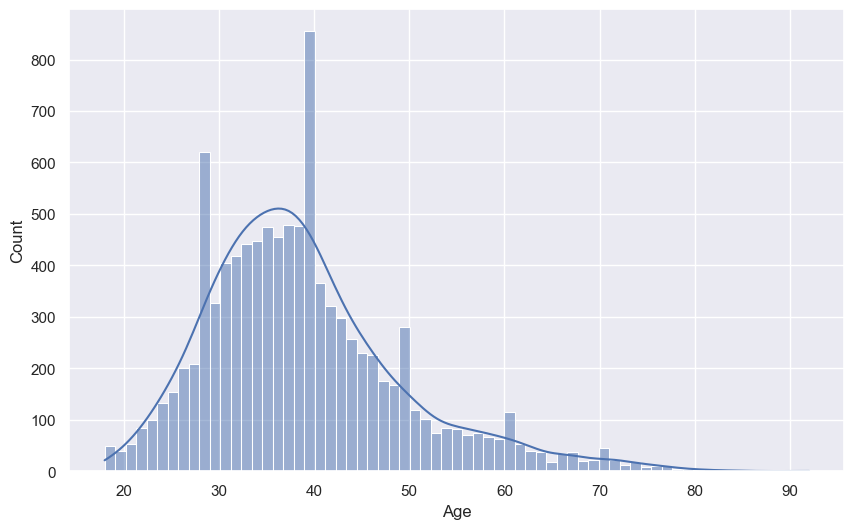

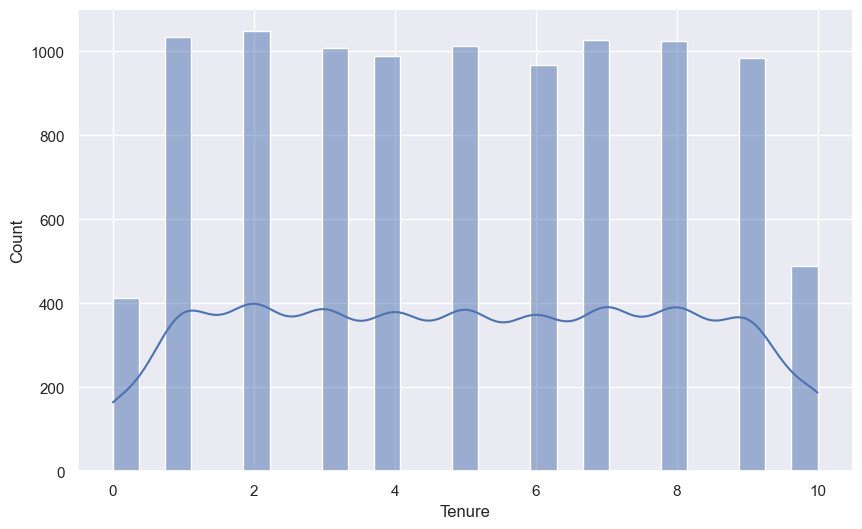

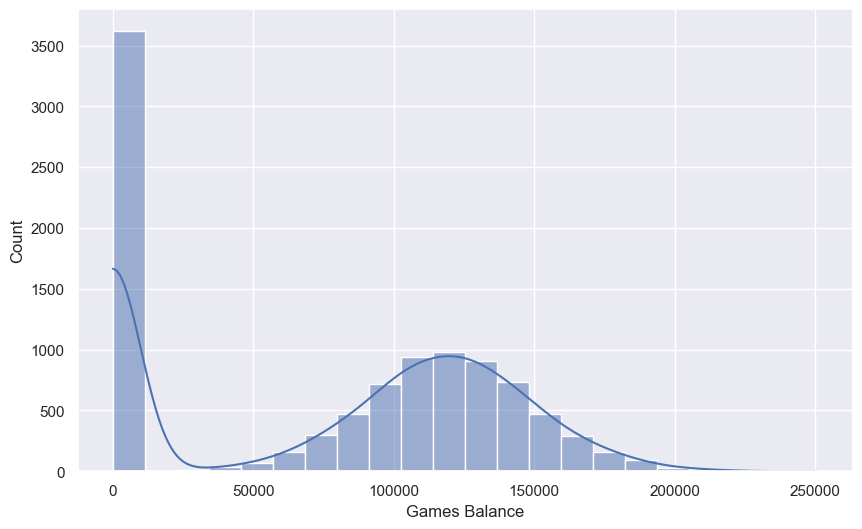

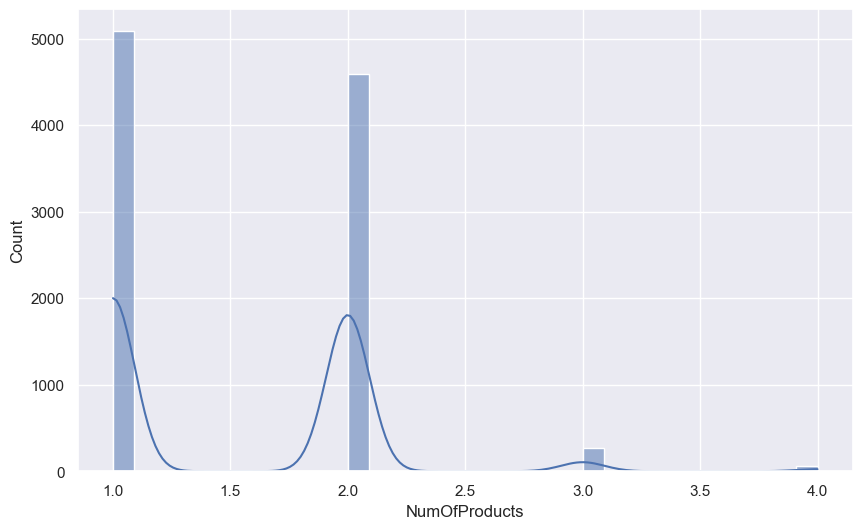

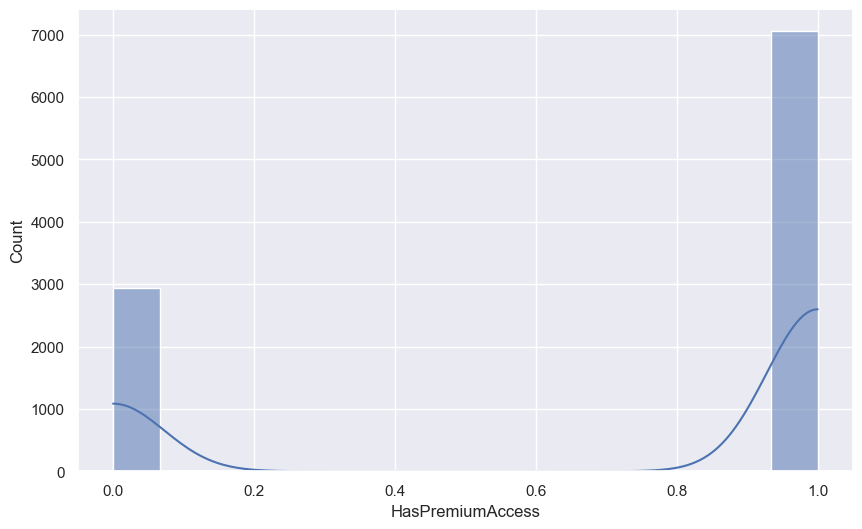

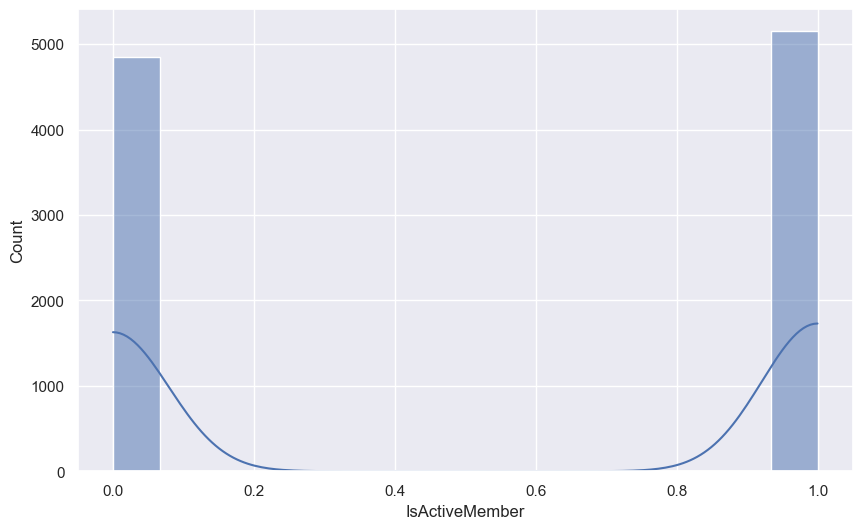

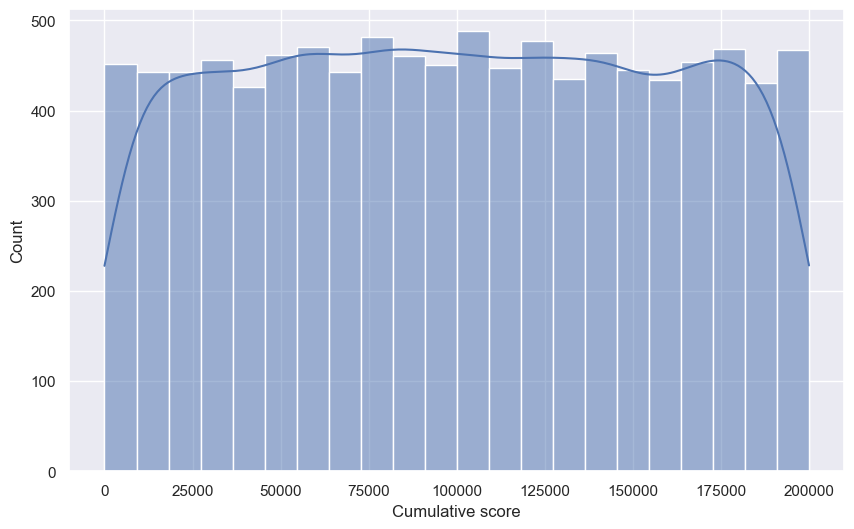

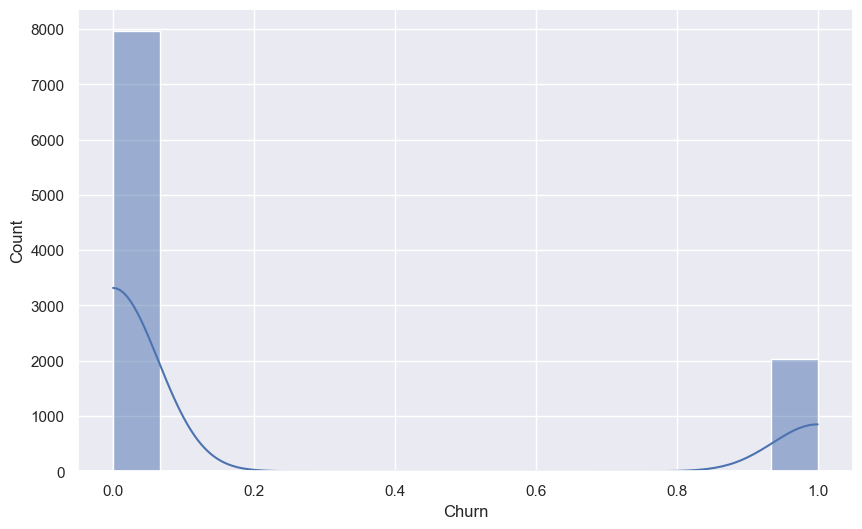

In [12]:
for i in df2.columns:
    plt.figure(figsize= [10.0, 6.0])
    sns.histplot(df[i], kde=True)
    plt.show()

In [18]:
# Realizamos la discretización del atributo Score con pd.cut y bins / labels a medida
bins = [0, 300, 500, 700, 900, np.inf]
labels = ['Muy_bajo', 'Bajo', 'Medio', 'Medio_alto', 'Alto']
for score in df:
    df['ScoreGroup'] = pd.cut(df["Score"], bins=bins, labels=labels)

<Axes: xlabel='ScoreGroup', ylabel='Churn'>

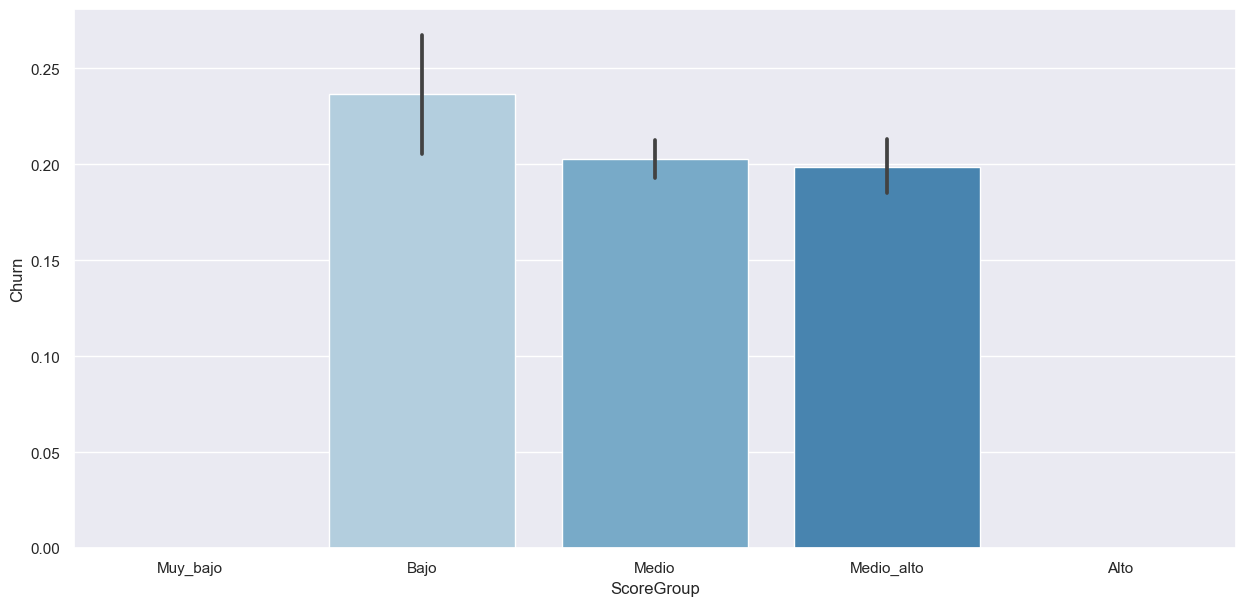

In [19]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="ScoreGroup", y="Churn", data=df, palette = 'Blues')

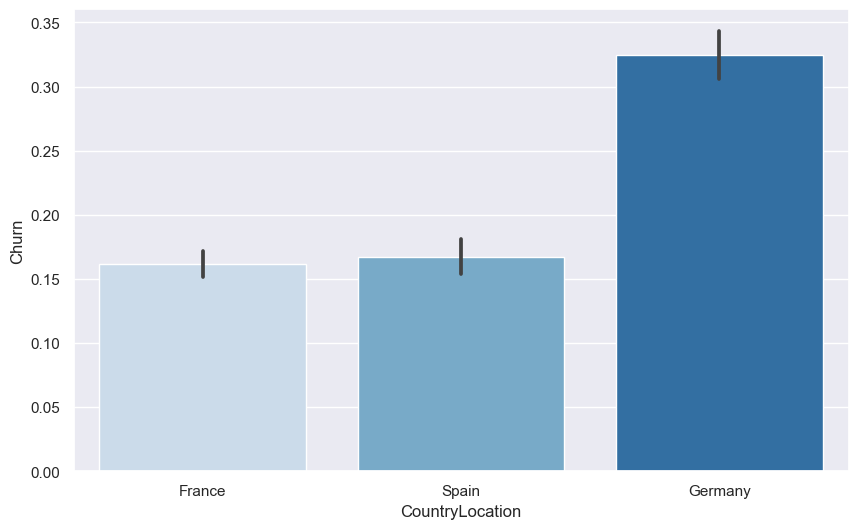

In [20]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CountryLocation", y="Churn", data=df, palette = 'Blues')
plt.show()

<Figure size 1000x600 with 0 Axes>

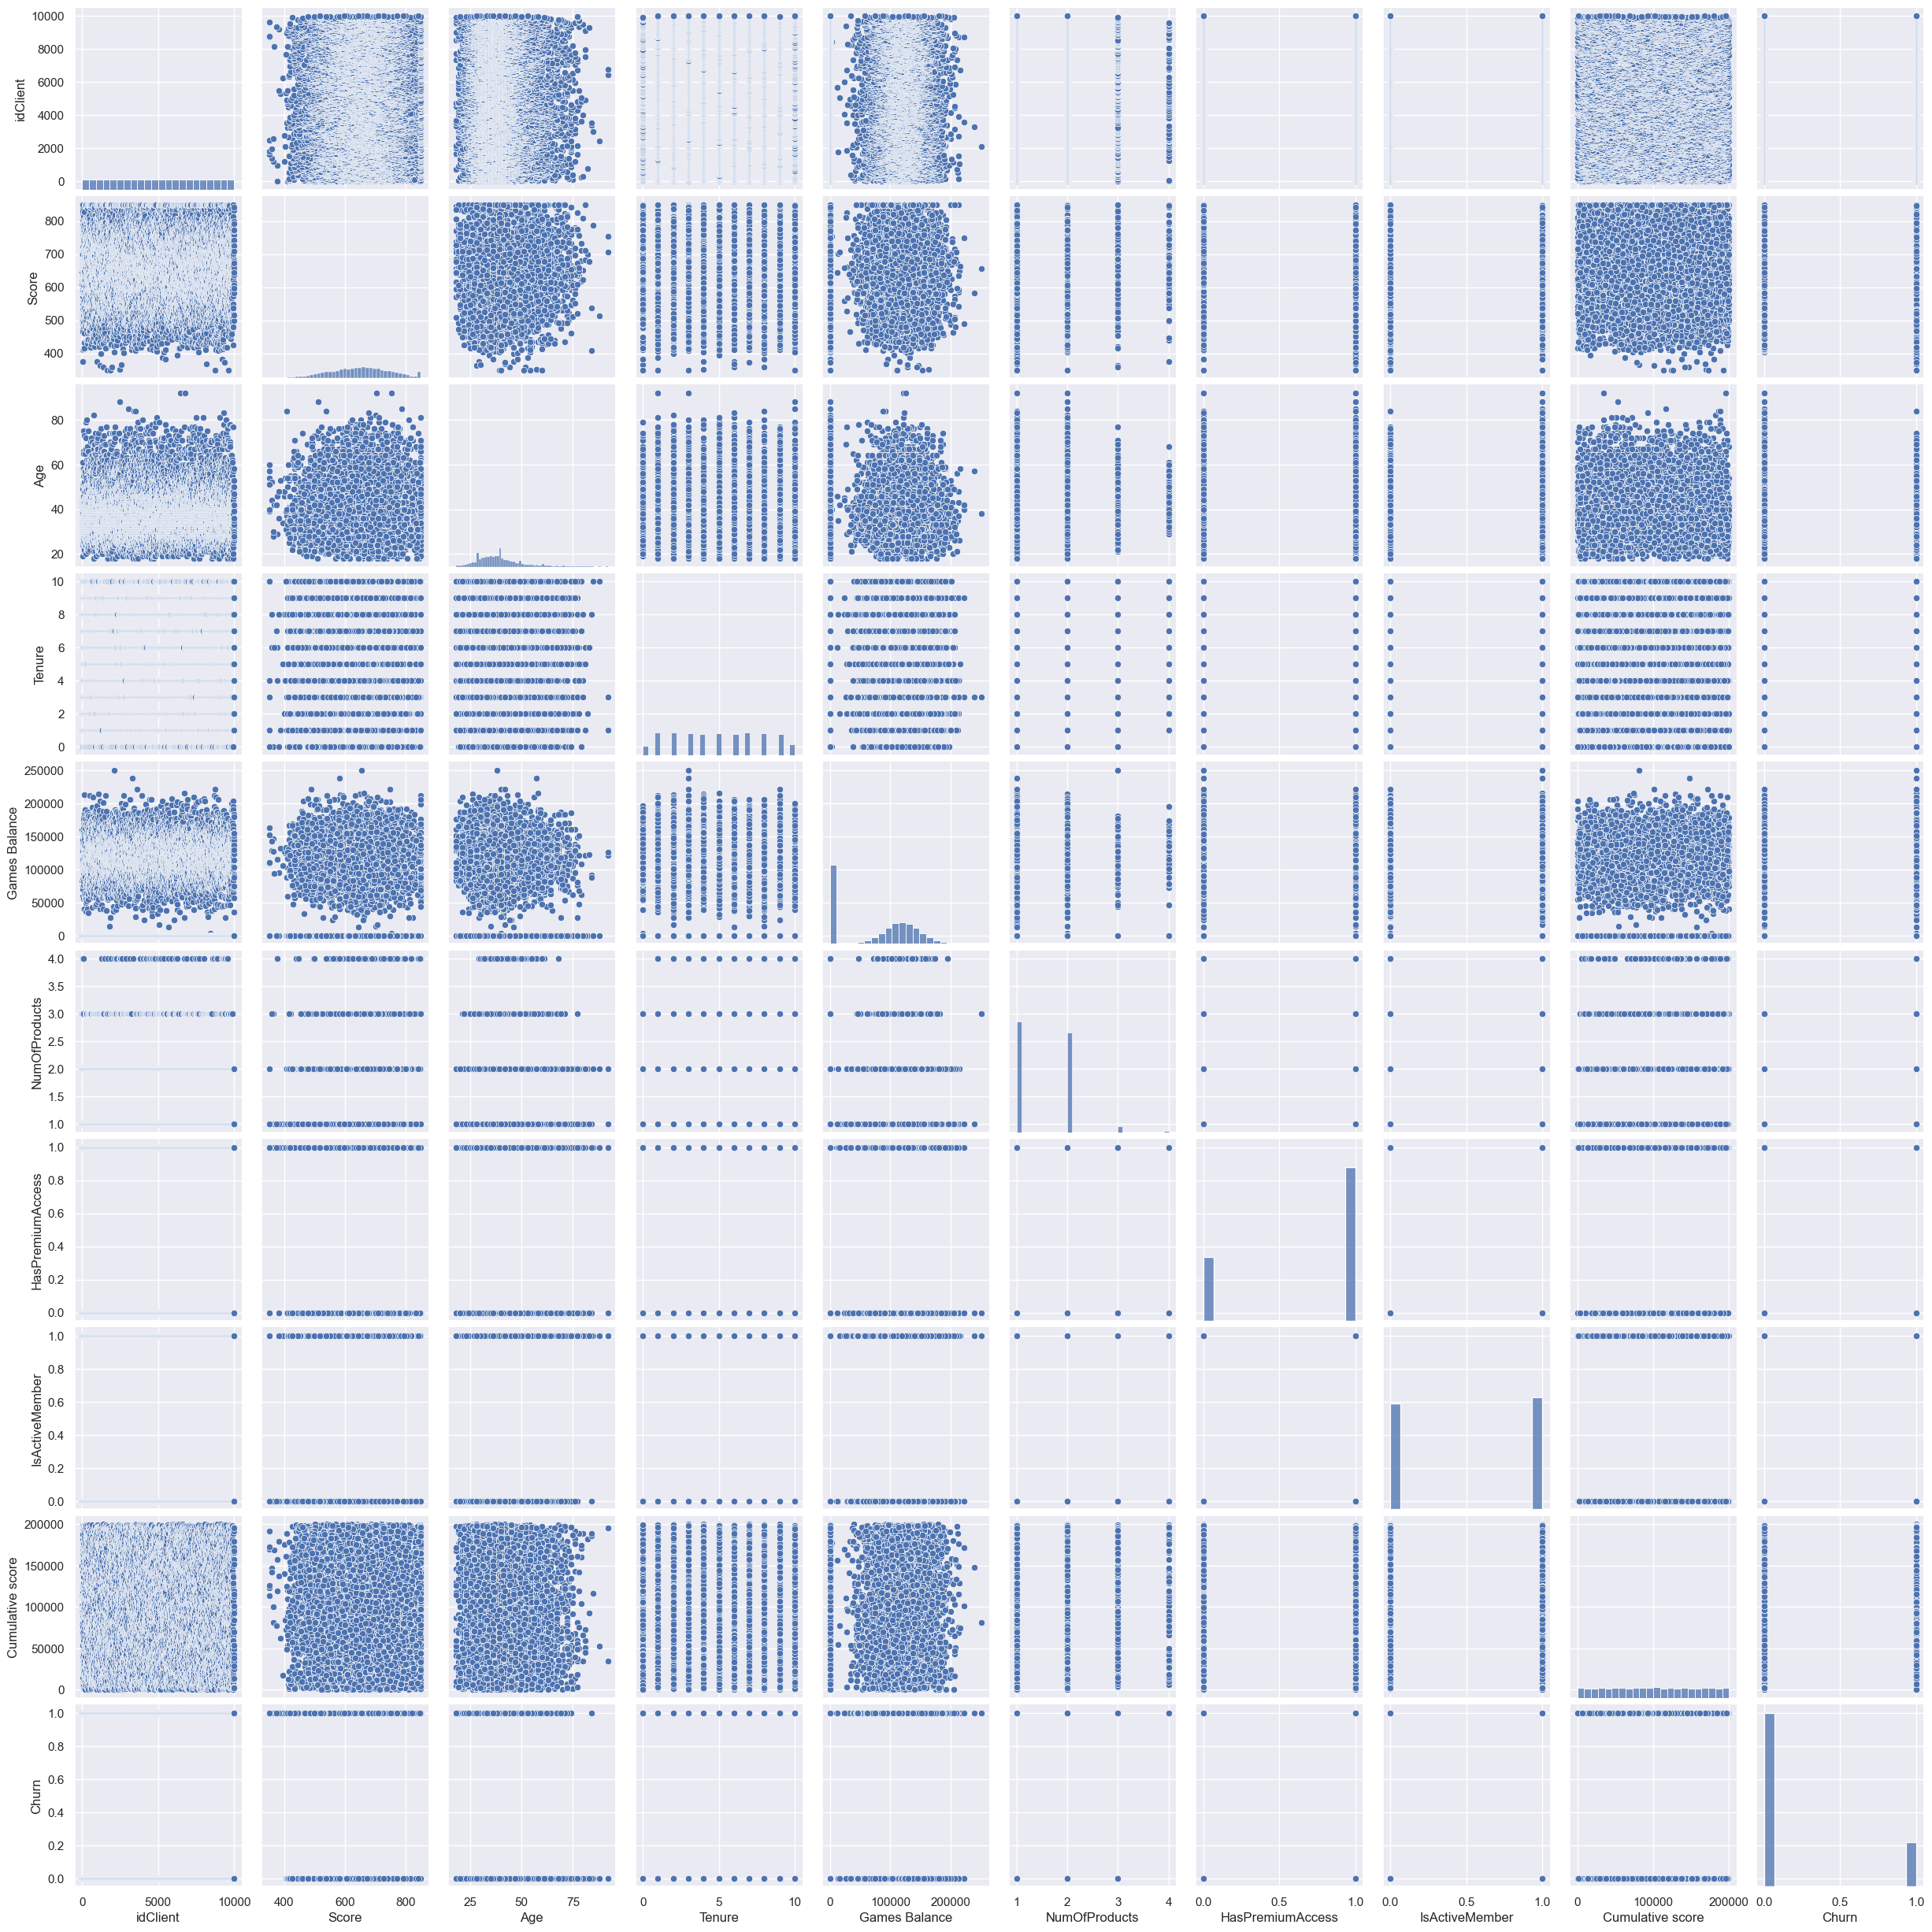

In [16]:

plt.figure(figsize= [10.0, 6.0])
sns.pairplot(data = df2)
plt.show()

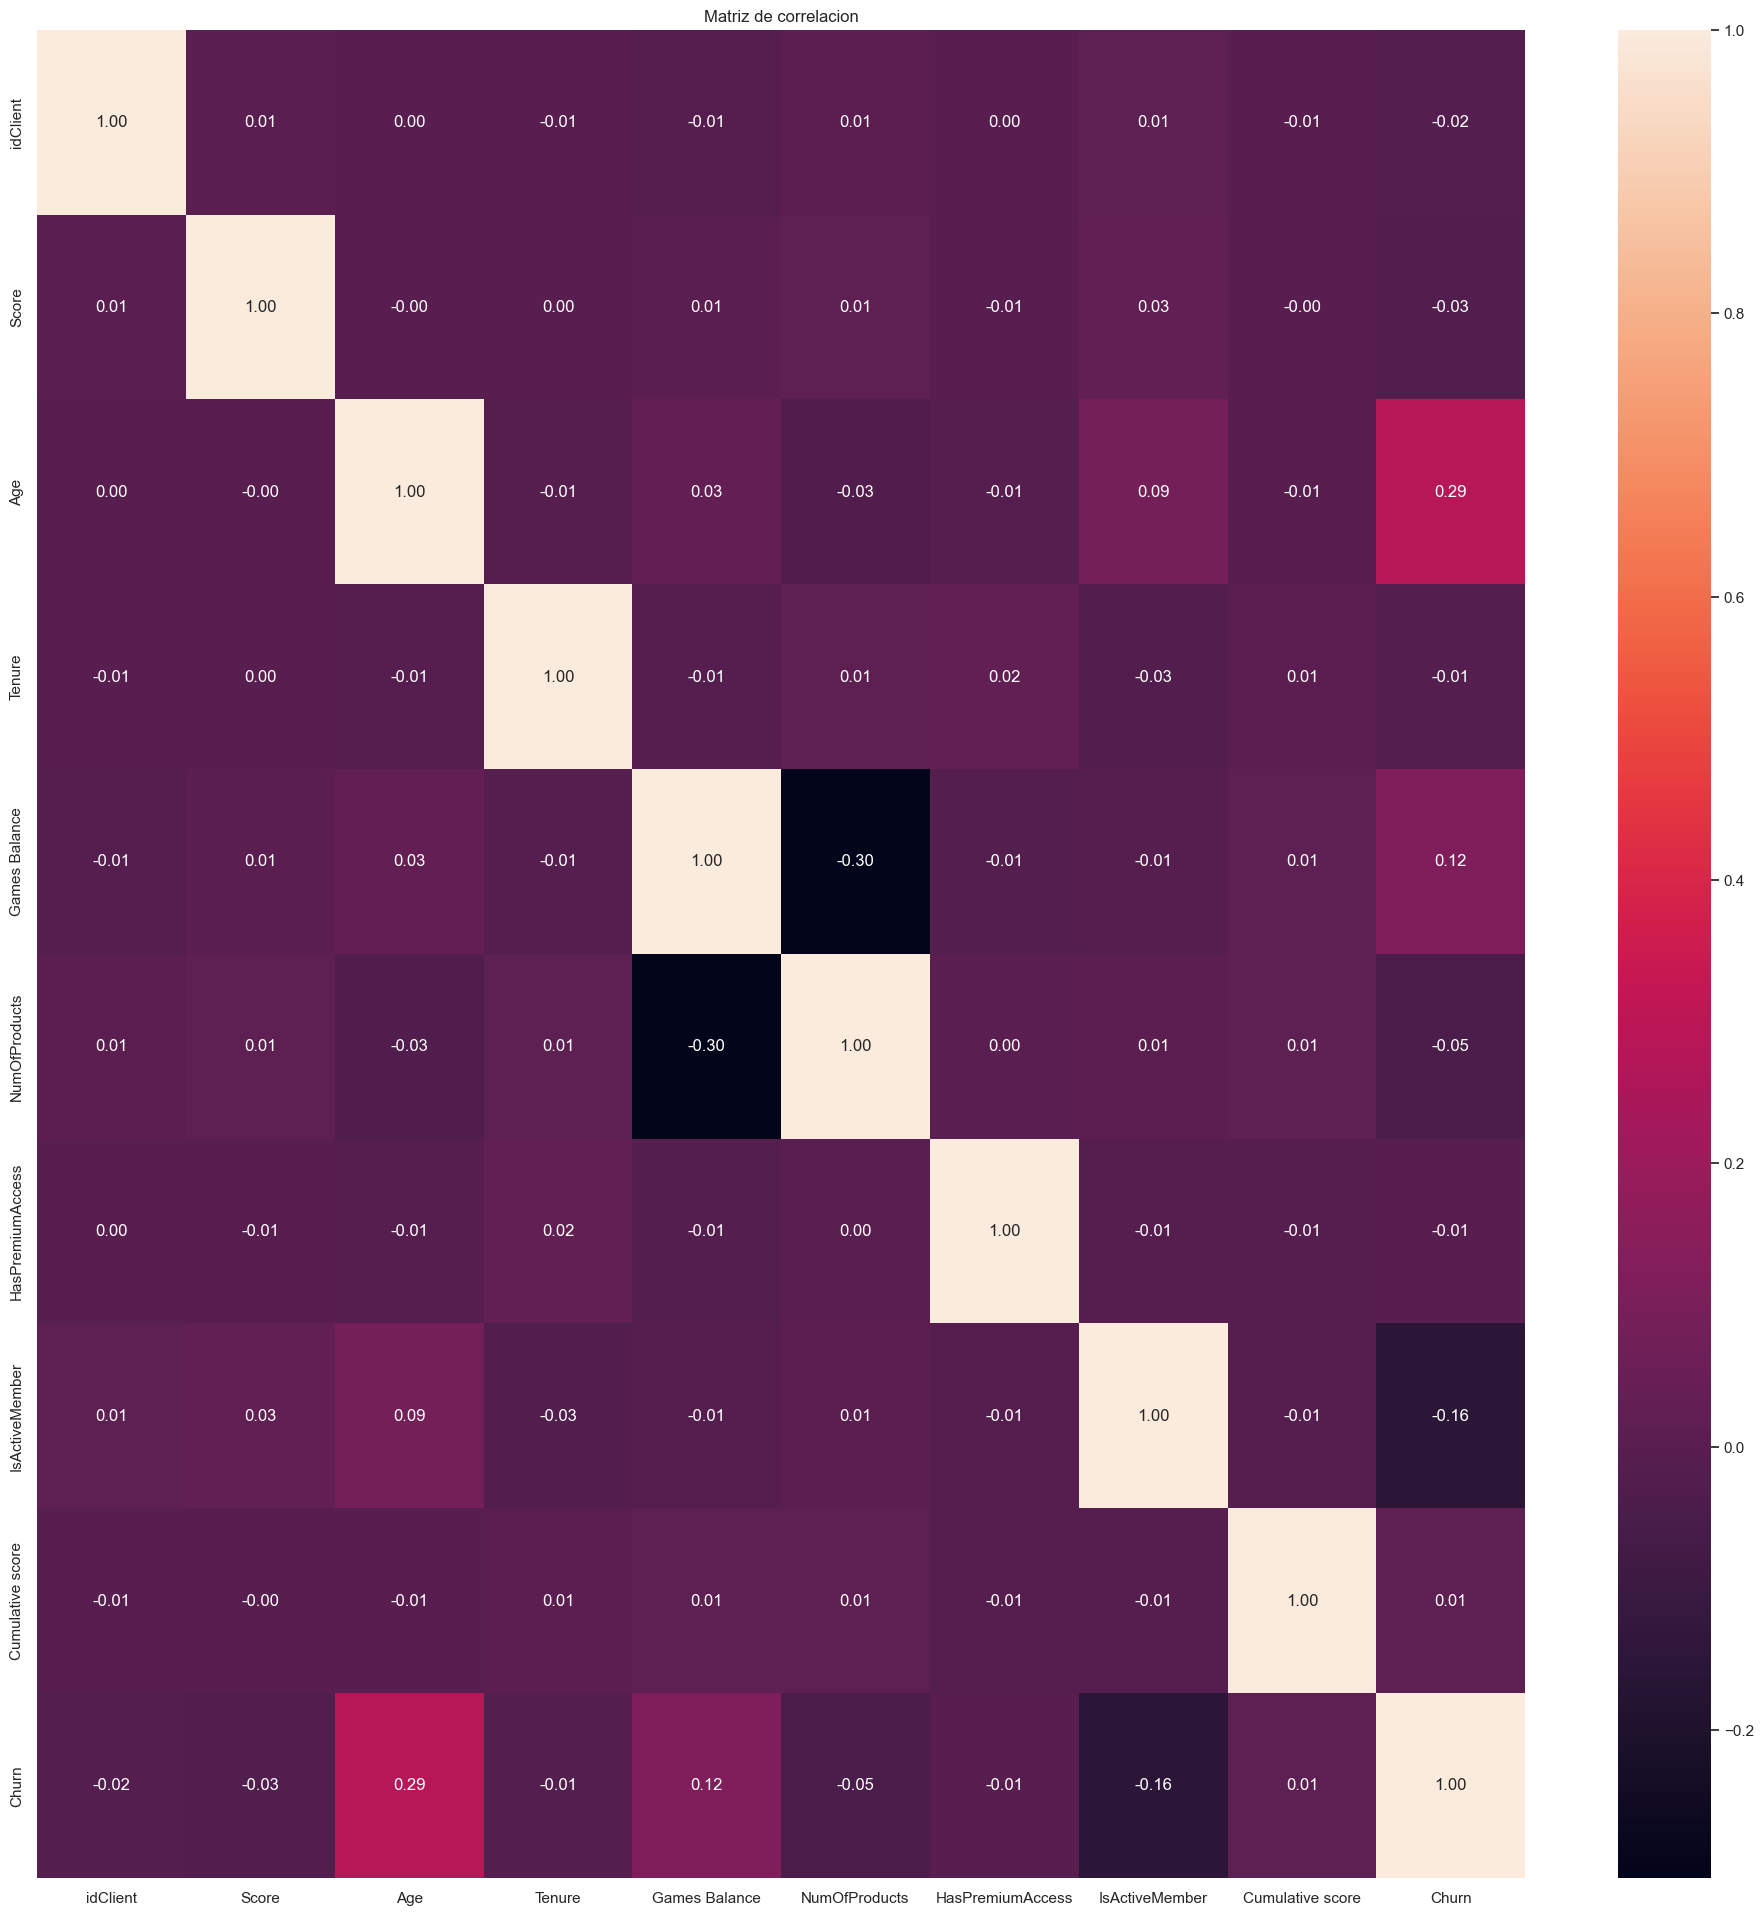

In [17]:
correlations = df2.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()


<a href='2a_ML_Baseline.ipynb'>Ver siguiente notebook</a>